# Visualizing 2-dimensional Fermi surface

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd #data frame library

import ipywidgets as widgets #ipython notebook widgets library
from ipywidgets import interact 

## Thight binding model
### $$E(\vec{k_x,k_y}) = -\cos{k_x}-\cos{k_y}$$

In [58]:
def tb(kx,ky):
    return(-np.cos(kx)-np.cos(ky))

## Brillouin zone
### $$-\frac{\pi}{a} < k_x,k_y < \frac{\pi}{a}$$

In [57]:
#1-dimensional array to define limits of Brillouin zone
bz = np.linspace(-np.pi,np.pi,500)

In [43]:
#2-dimensional grid generation
grid = []
for i in bz:
    for j in bz:
            grid.append([i,j])
grid = np.array(grid)
x = grid.T[0]
y = grid.T[1]

In [44]:
#Data frame for crystal momentum and energy values
df = pd.DataFrame()
df['x']= x
df['y']= y
df['E']= tb(x,y)

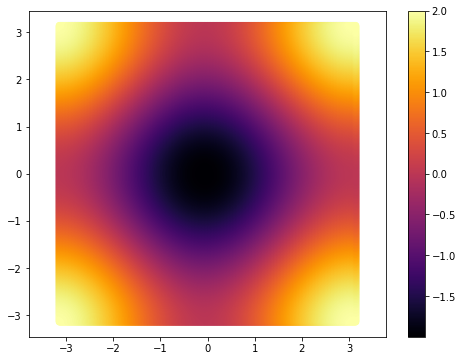

In [53]:
#Plotting the dispersion relation
#kx and ky vs. E
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y,c=tb(x,y),cmap="inferno")
plt.axis("equal")
plt.colorbar()
plt.show()

In [54]:
#Data frame to get kx and ky for a given E value
def fermi_surface(fermi_energy):
    fig = plt.figure(figsize=(6,6))
    fs = df.query("{} - 0.01 <= E <= {} + 0.01".format(fermi_energy,fermi_energy)) 
    plt.scatter(fs.x,fs.y)
    plt.xlim(-np.pi,np.pi)
    plt.ylim(-np.pi,np.pi)
    return plt.show()

In [56]:
#Slidert to choose a specific Fermi energy
interact(fermi_surface, fermi_energy=widgets.FloatSlider(min=-2, max=2, step=0.01))

interactive(children=(FloatSlider(value=0.0, description='fermi_energy', max=2.0, min=-2.0, step=0.01), Output…

<function __main__.fermi_surface(fermi_energy)>